In [2]:
%matplotlib inline
import matplotlib 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
from dateutil import parser
import datetime
import pytz
localtz = pytz.timezone('US/Eastern')

sns.set(style='white', palette='Set2')

def dateparse (timestamp):    
    return parser.parse(timestamp)


df = pd.read_pickle('ml_conditions_plus.pkl')

df.index = df.index.tz_convert('US/Eastern')


print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity' u'forecastio_ozone'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature' 'as_o3' 'as_co'
 'as_h2s' 'sck_temperature' 'sck_humidity' 'forecastio_temperature_c'
 'avg_15_as_temperature' 'avg_60_forecastio_temperature_c'
 'derivative_

In [3]:
#ozone values - as_03, forecastio_ozone, and EPA ozone (to be imported)

#forecastio ozone predictions are only for last 2-3 days, seem very far off (very high), removing

def dateparse (timestamp):    
    return parser.parse(timestamp)

epa_coo3_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/042516/coando3042516.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','co','o3'])
epa2_coo32_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/052316/coando3052316.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','co','o3'])
epa3_coo33_min = pd.read_csv('/Users/davidramsay/Documents/thesis/arduinoDataSafe/cleanedData/EPA/061316fullset/coando3061316.csv', parse_dates=True, index_col=0, skiprows=[0,1], names=['timestamp','co','o3'])

#strip whitespace from headings
epa_coo3_min.rename(columns=lambda x: x.strip(), inplace=True)
epa2_coo32_min.rename(columns=lambda x: x.strip(), inplace=True)
epa3_coo33_min.rename(columns=lambda x: x.strip(), inplace=True)

epa_co_o3 = pd.concat([epa_coo3_min, epa2_coo32_min, epa3_coo33_min])
epa_co_o3.index = epa_co_o3.index.tz_localize('US/Eastern')

print len(df)
print len(epa_co_o3)

74961
74961


In [4]:
#concatenate into one array

df = pd.concat([df, epa_co_o3], axis=1, join_axes=[df.index])
df.head()

,alphaS3_aux,pressureWind,alphaS1_aux,alphaS2_aux,sharpDust,alphaS3_work,alphaS2_work,alphaS1_work,alphaTemp,min_since_plugged_in,...,avg_60_forecastio_apparentTemperature,avg_60_forecastio_cloudCover,avg_60_forecastio_precipProbability,avg_60_forecastio_ozone,avg_60_forecastio_visibility,avg_60_forecastio_precipIntensity,avg_60_forecastio_windBearing,avg_60_forecastio_windSpeed,co,o3
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-04-15 06:13:00-04:00,177.000000,0.000000,984.000000,6.000000,817.000000,975.000000,975.000000,973.000000,62.000000,0,...,32.797333,0.042,0.0,NaN,10.0,0.0,82.90,7.105333,280.63,24.3
2016-04-15 06:14:00-04:00,68.054858,31067.307210,806.095592,5.330721,242.771158,261.446702,979.653605,977.322884,61.669279,1,...,32.820000,0.045,0.0,NaN,10.0,0.0,88.75,7.115000,265.76,24.0
2016-04-15 06:15:00-04:00,50.000000,31016.921631,273.470213,6.000000,210.751566,90.444356,983.673197,214.528990,61.673197,2,...,32.842667,0.048,0.0,NaN,10.0,0.0,94.60,7.124667,262.03,23.2
2016-04-15 06:16:00-04:00,49.000000,31011.520378,173.959244,6.000000,196.072104,70.062695,983.000000,121.833853,61.000000,3,...,32.865333,0.051,0.0,NaN,10.0,0.0,100.45,7.134333,259.47,22.7
2016-04-15 06:17:00-04:00,48.318966,30948.793120,131.215514,6.000000,198.043103,64.362069,983.318966,101.086206,61.000000,4,...,32.888000,0.054,0.0,NaN,10.0,0.0,106.30,7.144000,259.19,23.9


In [5]:
#create rolling average of alphasense measurement, delete forecastio_ozone because it's useless

df.drop('forecastio_ozone', axis=1, inplace=True)

num_avg = 10

ref_col = 'as_o3'
avg_col= 'avg_' + str(num_avg) + '_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()

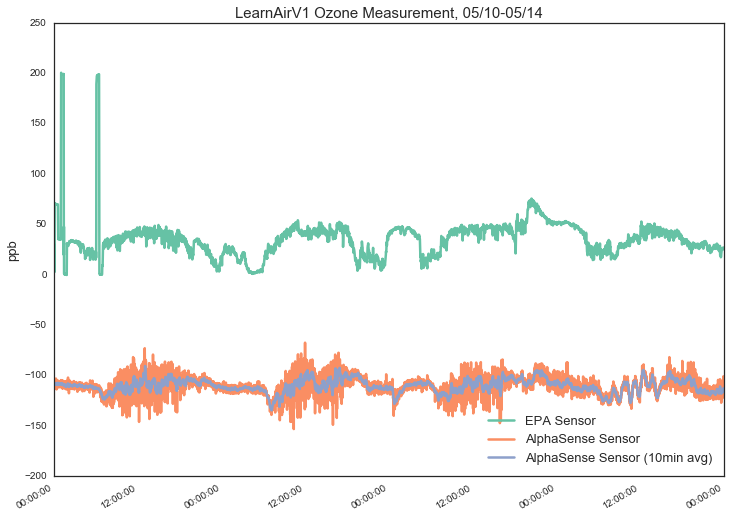

In [6]:
starttime = datetime.datetime(2016,5,10)
endtime = datetime.datetime(2016,5,14)

#value1 = 'forecastio_ozone'
value1 = 'o3'
value2 = 'as_o3'
value3 = 'avg_10_as_o3'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value2].values, lw=2.5)
if value3 is not None:
    plt.plot(df.ix[starttime:endtime].index.values, df.ix[starttime:endtime][value3].values, lw=2.5)
    
plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (10min avg)'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 Ozone Measurement, 05/10-05/14', fontsize=15)

plt.savefig('./figs/ozone_zoomed.png', bbox_inches='tight', dpi=200)

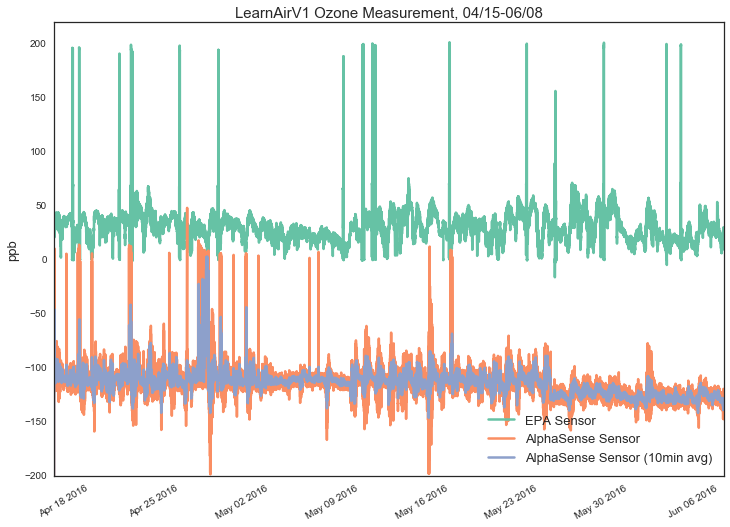

In [7]:
value1 = 'o3'
value2 = 'as_o3'
value3 = 'avg_10_as_o3'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5)
if value3 is not None:
    plt.plot(df.index.values, df[value3].values, lw=2.5)   

plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (10min avg)'], fontsize=13, loc=4 )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 Ozone Measurement, 04/15-06/08', fontsize=15)
plt.ylim(-200,220)

plt.savefig('./figs/ozone.png', bbox_inches='tight', dpi=200)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/scipy/optimize/_minimize.py:330: RuntimeWarning: Method COBYLA cannot handle bounds.
  RuntimeWarning)
/Library/Python/2.7/site-packages/ipykernel/__main__.py:23: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [   0.99474309  146.75011662]

TNC minimization= [   0.6  100. ]

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 40045120.0177
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [   1.  147.]

original rmse = 147.16456845
after optimization rmse = 23.0886724062
COBYLA minimization= [   1.00383647  146.85648536]

TNC minimization= [   0.6  100. ]

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 32102386.7632
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [   1.  147.]



/Library/Python/2.7/site-packages/ipykernel/__main__.py:66: OptimizeWarning: Unknown solver options: xtol


original rmse = 146.771822199
after optimization rmse = 20.6782374608


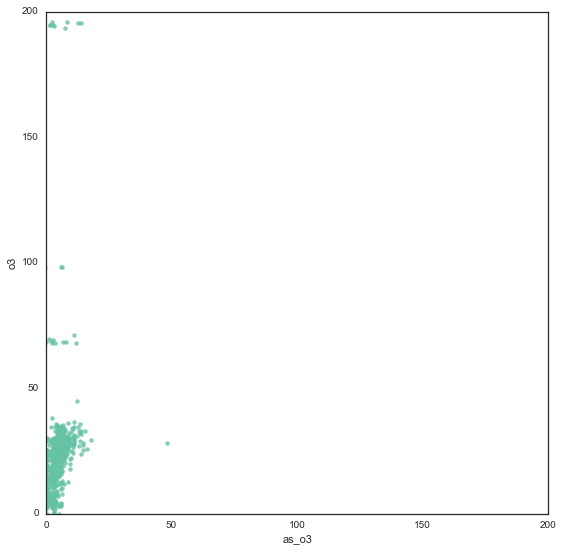

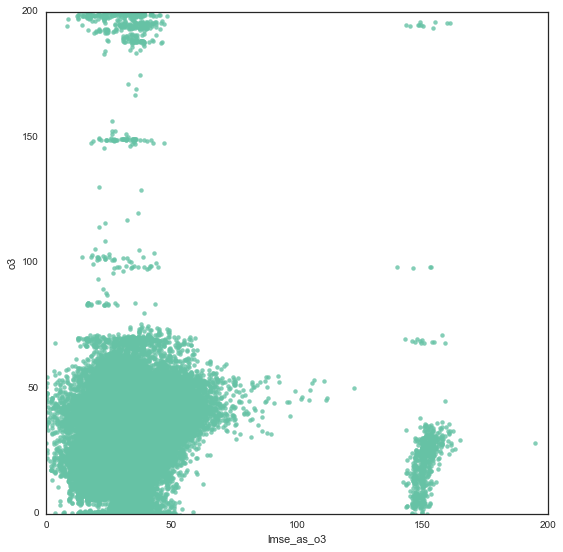

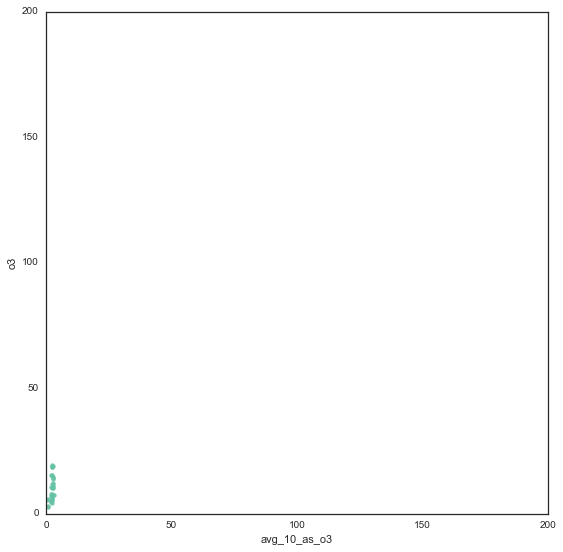

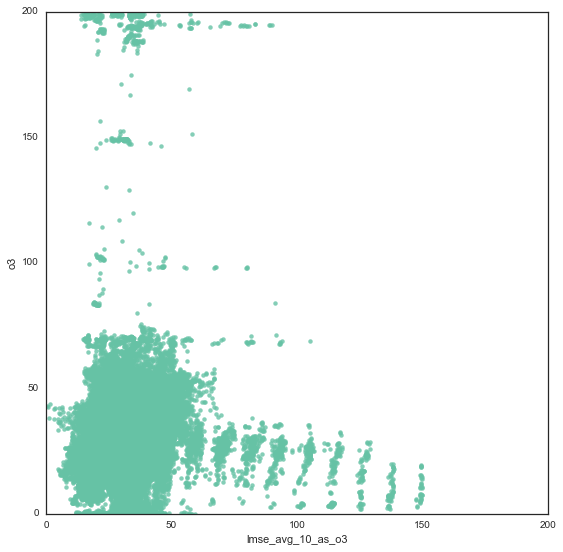

In [8]:
#could just LMSE scale and offset

#RMS fit - scale factor and offset

#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'o3'
scaled_col = 'as_o3'
new_col = 'lmse_as_o3'

bnds = ((0.6, 1.2), (100, 200))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([1.,147.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse


ref_col = 'o3'
scaled_col = 'avg_10_as_o3'
new_col = 'lmse_avg_10_as_o3'

total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col].values + x[1]) - df[ref_col].values)**2)

x0 = np.array([1.,147.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]


fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)


total_rmse = math.sqrt( np.nansum((df[scaled_col].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse

mean = -113.496058642, std = 15.794025351
mean = -113.471641698, std = 11.9774399137
mean = 31.8525653682, std = 18.0199229185
COBYLA minimization= [   1.01331968  146.85422353]



/Library/Python/2.7/site-packages/ipykernel/__main__.py:41: OptimizeWarning: Unknown solver options: xtol


TNC minimization= [   0.60336476  100.        ]

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 6503326.61334
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [   1.  147.]

original rmse = 124.809871
after optimization rmse = 15.4696381054
COBYLA minimization= [   1.01762215  146.87392624]

TNC minimization= [   0.60314108  100.        ]

Positive directional derivative for linesearch    (Exit mode 8)
            Current function value: 5354588.36025
            Iterations: 5
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [   1.  147.]



/Library/Python/2.7/site-packages/ipykernel/__main__.py:83: OptimizeWarning: Unknown solver options: xtol


original rmse = 117.520845595
after optimization rmse = 12.1338354764
after optimization comparison rmse = 20.7364338622


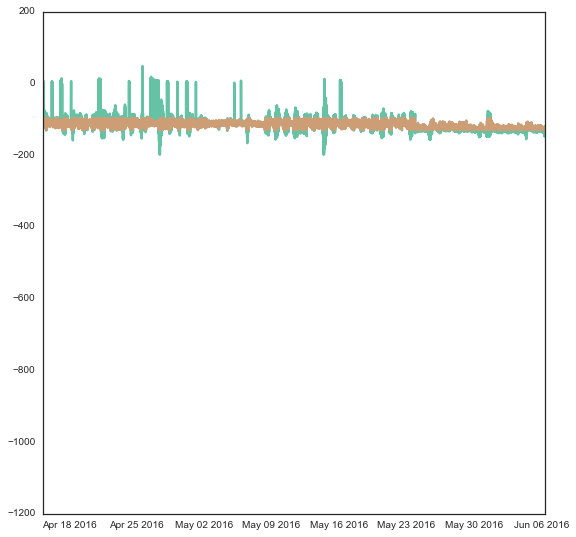

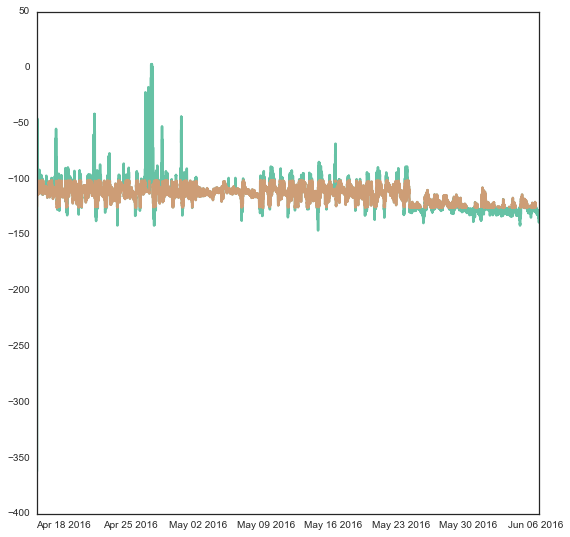

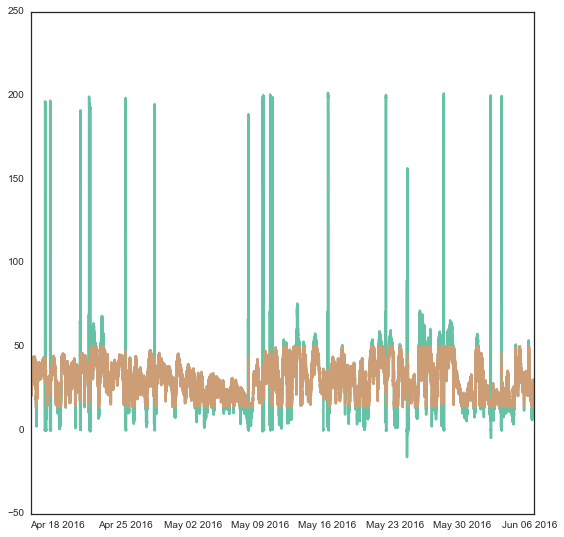

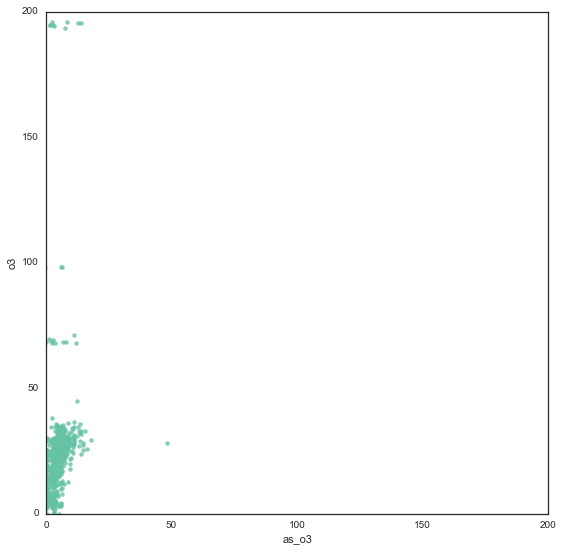

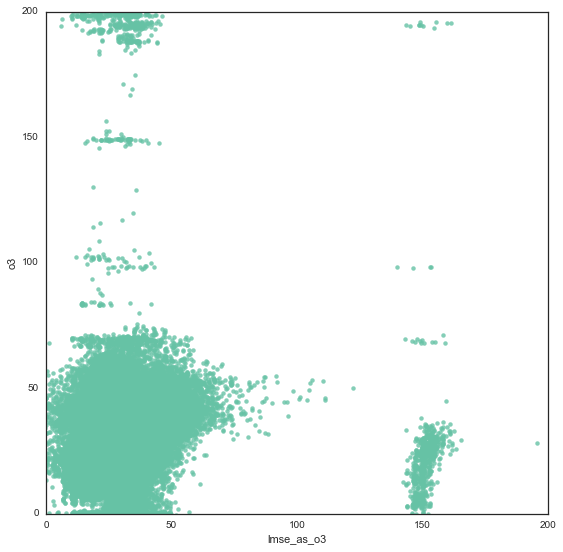

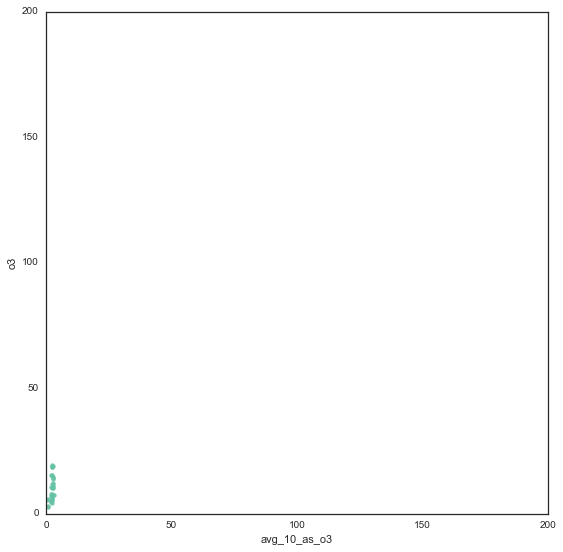

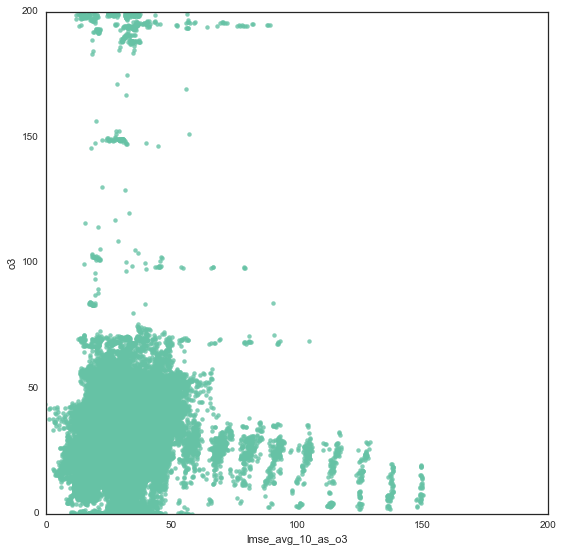

In [23]:
#SAME AS PREVIOUS BLOCK - this time we're trying throwing away outliers- only using values 1 stdev from mean 
# in each set as training data for RMS error, to mitigate effects of big spikes

#could just LMSE scale and offset

#RMS fit - scale factor and offset

#go through each as_o3, lmse_as_o3, and o3, find mean/stdev, and replace anything above 1 stdev with np.nan
cols = ['as_o3', 'avg_10_as_o3', 'o3']

for col in cols:
    mean = df[col].mean()
    stdev = df[col].std()
    print 'mean = %s, std = %s' % (mean, stdev)
    
    df[col + '_removedoutliers'] = [val if val > mean-stdev and val < mean+stdev else np.nan for val in df[col]]
    
    fig, ax = plt.subplots(figsize=(9, 9))
    plt.plot_date(df.index.values, df[col].values, tz=localtz, ls='solid', marker=None, lw=2.5)
    plt.plot(df.index.values, df[col + '_removedoutliers'].values, lw=2.5, alpha=.7) 


#find a,b where we minimize sqrt( sum((a*scaled_ws+b)-ws)^2 / n ), same as minimzing sum((a*scaled_ws+b)-ws)^2 

ref_col = 'o3'
scaled_col = 'as_o3'
new_col = 'lmse_as_o3'

bnds = ((0.6, 1.2), (100, 200))

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col + '_removedoutliers'].values + x[1]) - df[ref_col +  '_removedoutliers'].values)**2)

x0 = np.array([1.,147.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)


total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse


ref_col = 'o3'
scaled_col = 'avg_10_as_o3'
new_col = 'lmse_avg_10_as_o3'

total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )

def minimize_me(x):
    return np.nansum(((x[0]*df[scaled_col + '_removedoutliers'].values + x[1]) - df[ref_col + '_removedoutliers'].values)**2)

x0 = np.array([1.,147.])
res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

df[new_col] = df[scaled_col]*res.x[0]+res.x[1]

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(scaled_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)


total_rmse = math.sqrt( np.nansum((df[scaled_col + '_removedoutliers'].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

fig, ax = plt.subplots(figsize=(9, 9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col + '_removedoutliers'].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization comparison rmse = %s' % total_rmse

for col in cols:
    df.drop(col + '_removedoutliers', axis=1, inplace=True)

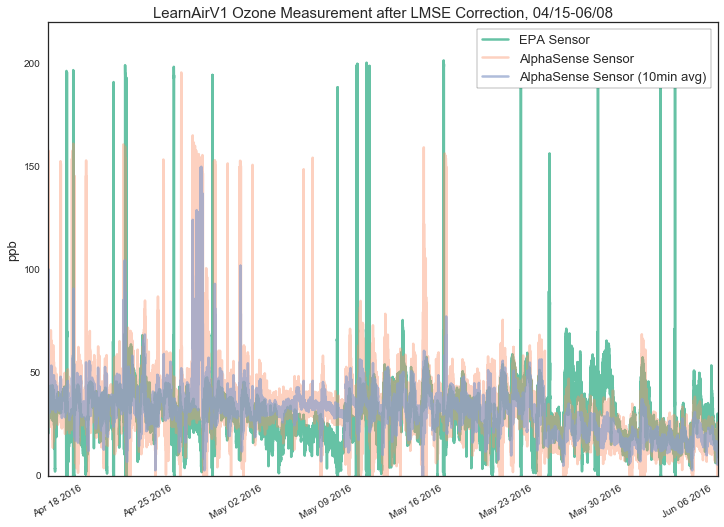

In [10]:
value1 = 'o3'
value2 = 'lmse_as_o3'
value3 = 'lmse_avg_10_as_o3'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=.4)
if value3 is not None:
    plt.plot(df.index.values, df[value3].values, lw=2.5, alpha=.7)   

plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (10min avg)'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 Ozone Measurement after LMSE Correction, 04/15-06/08', fontsize=15)
plt.ylim(0,220)

plt.savefig('./figs/ozone_lmse_fit.png', bbox_inches='tight', dpi=200)

/Library/Python/2.7/site-packages/ipykernel/__main__.py:40: OptimizeWarning: Unknown solver options: xtol


COBYLA minimization= [ 271.27596131  293.52001887]

TNC minimization= [ 271.72957472  293.97368838]

Inequality constraints incompatible    (Exit mode 4)
            Current function value: 1623461126.53
            Iterations: 1
            Function evaluations: 4
            Gradient evaluations: 1
SLSQP minimization= [ 290.  273.]

original rmse = 147.16456845
after optimization rmse = 23.0539700735


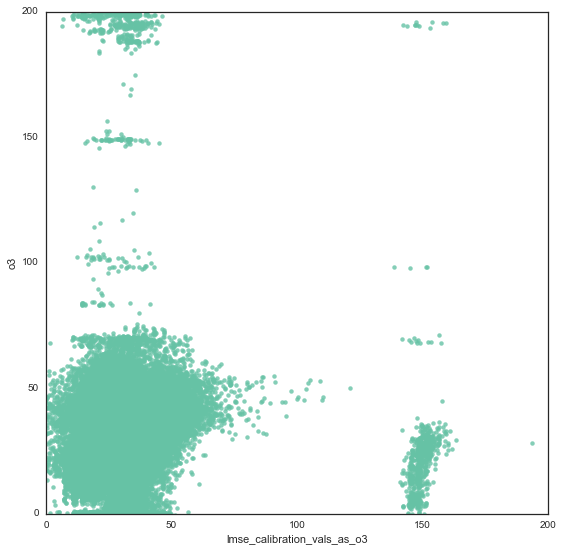

In [21]:
# could refit using orignal values and transform 
# (minimize error when we're solving for scale factor, we electrode offset, etc)

#doesn't work if we leave in scale factor, but if we remove it (assume transimpedance amp is stable through time 
# and major issue is electrolyte depletion of sensor), we get a very good fit and a new calibration.  Doesn't do as
# well as prevous methods - first method above does the best (simple LMSE, no standard deviation filtering or anything)

'''
#alphasensor #1 = O3
we_zero = 290.0 #mV
ae_zero = 273.0 #mV
sensitivity = 0.270 #mV/ppb
'''
sensitivity=0.27
n_temps = [5] #degrees C that seperate n regimes
n= [0.75, 1.28] #n values that correspond to n_temps [<n_temps[0], >n_temps[0]]

def compute_o3_val(n_temps, n, temp, we, we_zero, ae, ae_zero, sensitivity):
    if temp < n_temps[0]:
        return ((we - we_zero) - (n[0]*ae - ae_zero)) / sensitivity
    else:
        return ((we - we_zero) - (n[1]*ae - ae_zero)) / sensitivity

ref_col = 'o3'
new_col = 'lmse_calibration_vals_as_o3'

import math
from scipy.optimize import minimize

total_rmse = math.sqrt( np.nansum((df['as_o3'].values - df[ref_col].values)**2) / len(df) )

def minimize_me(x):
    #return np.nansum(([compute_o3_val(n_temps, n, temp, we, x[0], ae, x[1], x[2]) for we, ae, temp in \
    #                 zip(df['alphaS1_work'], df['alphaS1_aux'], df['as_temperature'])]- df[ref_col].values)**2)
    return np.nansum(([compute_o3_val(n_temps, n, temp, we, x[0], ae, x[1], sensitivity) for we, ae, temp in \
                     zip(df['alphaS1_work'], df['alphaS1_aux'], df['as_temperature'])]- df[ref_col].values)**2)

#x0 = np.array([290.,273.,0.27])
#bnds = ((220, 360), (200, 350), (0.27,0.27))
x0 = np.array([290.,273.])
bnds = ((220, 360), (200, 350))


res = minimize(minimize_me, x0, method='COBYLA', bounds=bnds,
                options={'xtol': 1e-8, 'disp': True})
print('COBYLA minimization= %s\n' % res.x)

res2 = minimize(minimize_me, x0, method='TNC', bounds=bnds,
                options={'disp': True})
print('TNC minimization= %s\n' % res2.x)

res3 = minimize(minimize_me, x0, method='SLSQP', bounds=bnds,
                options={'disp': True})
print('SLSQP minimization= %s\n' % res3.x)

#df[new_col] = [compute_o3_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], res.x[2]) \
#                    for we, ae, temp in zip(df['alphaS1_work'], df['alphaS1_aux'], df['as_temperature'])]
df[new_col] = [compute_o3_val(n_temps, n, temp, we, res.x[0], ae, res.x[1], sensitivity) \
                    for we, ae, temp in zip(df['alphaS1_work'], df['alphaS1_aux'], df['as_temperature'])]


fig, ax = plt.subplots(figsize=(9,9))
sns.regplot(new_col, ref_col, data=df, fit_reg=False)
plt.ylim(0,200)
plt.xlim(0,200)

total_rmse = math.sqrt( np.nansum((df['as_o3'].values - df[ref_col].values)**2) / len(df) )
print 'original rmse = %s' % total_rmse

total_rmse = math.sqrt( np.nansum((df[new_col].values - df[ref_col].values)**2) / len(df) )
print 'after optimization rmse = %s' % total_rmse

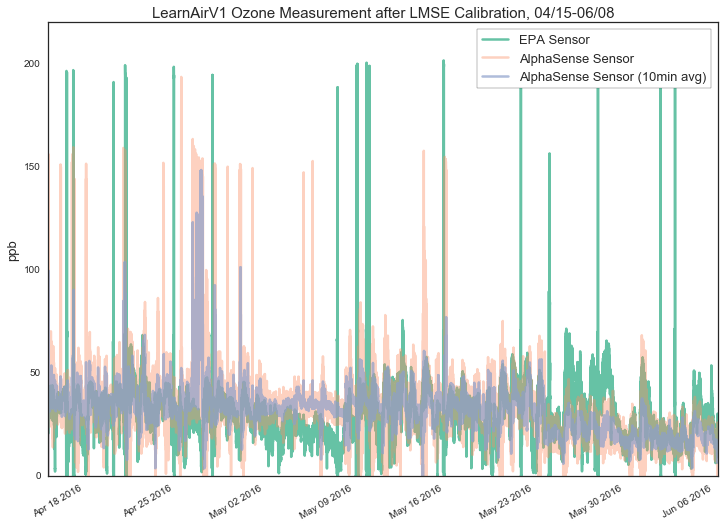

In [24]:
#create 10min avg of new alphasense o3 reading (fit with new calibration)
num_avg = 10

ref_col = 'lmse_calibration_vals_as_o3'
avg_col= 'avg_10_' + ref_col
df[avg_col] = df[ref_col].rolling(window=num_avg, center=True).mean()


value1 = 'o3'
value2 = 'lmse_calibration_vals_as_o3'
value3 = 'avg_10_lmse_calibration_vals_as_o3'

fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot_date(df.index.values, df[value1].values, tz=localtz, ls='solid', marker=None, lw=2.5)
if value2 is not None:
    plt.plot(df.index.values, df[value2].values, lw=2.5, alpha=.4)
if value3 is not None:
    plt.plot(df.index.values, df[value3].values, lw=2.5, alpha=.7)   

plt.legend(['EPA Sensor', 'AlphaSense Sensor', 'AlphaSense Sensor (10min avg)'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.title('LearnAirV1 Ozone Measurement after LMSE Calibration, 04/15-06/08', fontsize=15)
plt.ylim(0,220)

plt.savefig('./figs/ozone_lmse_calibration.png', bbox_inches='tight', dpi=200)

201.5
10.075
LMSE-Corrected Alphasense vs. EPA O3 Readings, 10% accuracy
correct readings= 40912
incorrect readings = 34049
201.5
10.075
LMSE-corrected Alphasense 10min avg vs. EPA O3 Readings, 10% accuracy
correct readings= 42714
incorrect readings = 32247
201.5
10.075
LMSE-corrected Calibration, Alphasense vs. EPA O3 Readings, 10% accuracy
correct readings= 41136
incorrect readings = 33825
201.5
10.075
LMSE-corrected Calibration, Alphasense 10min avg vs. EPA O3 Readings, 10% accuracy
correct readings= 42927
incorrect readings = 32034


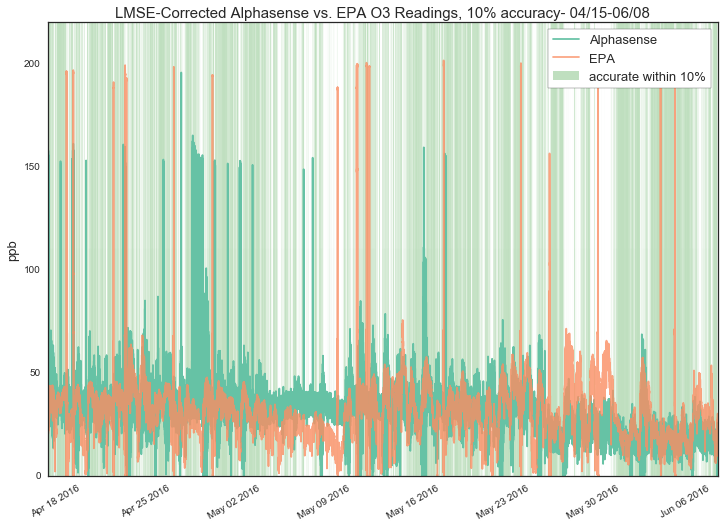

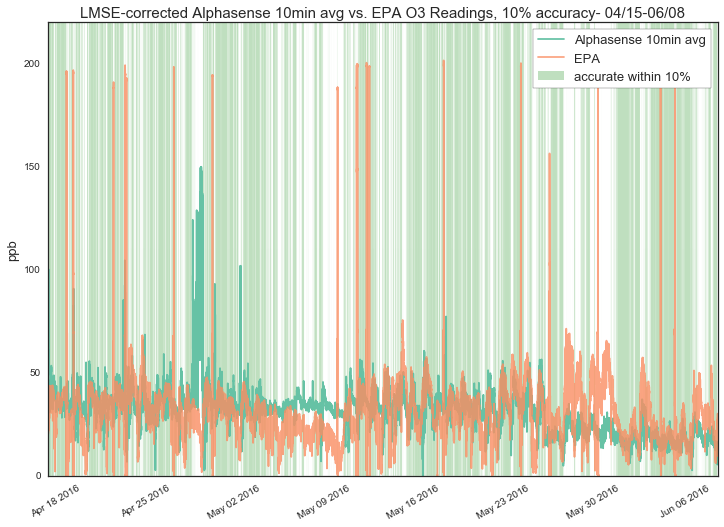

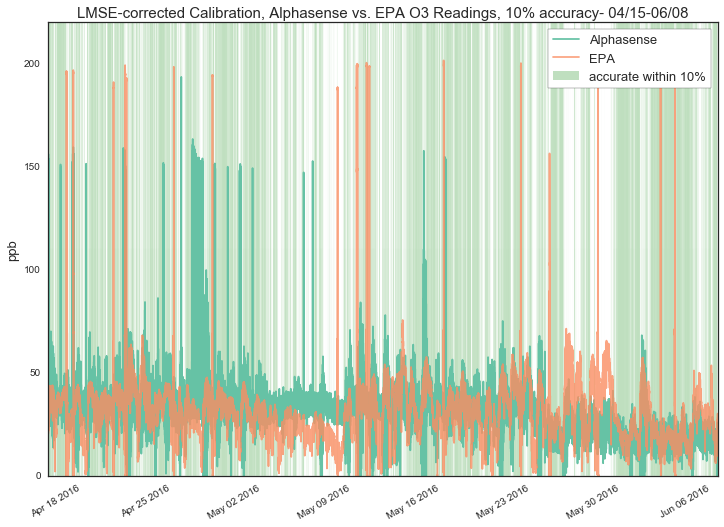

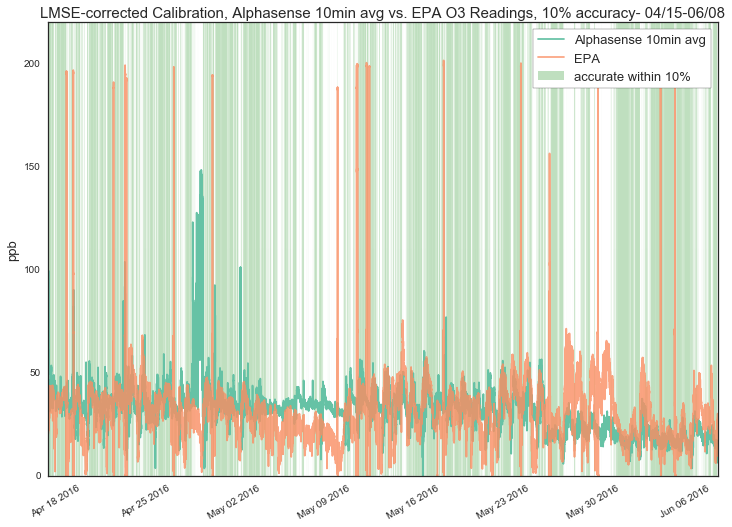

In [58]:
#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'lmse_as_o3'
ref_col = 'o3'
accurate_col = 'lmse_as_o3_compare_accurate_10_percent'

#value2 = 'lmse_as_o3'
#value3 = 'lmse_avg_10_as_o3'

tolerance = 0.1 #within 10 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df['lmse_as_o3'])
plt.plot(df['o3'], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('LMSE-Corrected Alphasense vs. EPA O3 Readings, 10% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense', 'EPA', 'accurate within 10%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,220)

print 'LMSE-Corrected Alphasense vs. EPA O3 Readings, 10% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())




#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'lmse_avg_10_as_o3'
ref_col = 'o3'
accurate_col = 'lmse_avg_10_as_o3_compare_accurate_10_percent'

#value2 = 'lmse_as_o3'
#value3 = 'lmse_avg_10_as_o3'

tolerance = 0.1 #within 10 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df['lmse_avg_10_as_o3'])
plt.plot(df['o3'], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('LMSE-corrected Alphasense 10min avg vs. EPA O3 Readings, 10% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense 10min avg', 'EPA', 'accurate within 10%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,220)

print 'LMSE-corrected Alphasense 10min avg vs. EPA O3 Readings, 10% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())





#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'lmse_calibration_vals_as_o3'
ref_col = 'o3'
accurate_col = 'lmse_calibration_vals_as_o3_compare_accurate_10_percent'

#value2 = 'lmse_calibration_vals_as_o3'
#value3 = 'avg_10_lmse_calibration_vals_as_o3'


tolerance = 0.1 #within 10 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df[main_col])
plt.plot(df[ref_col], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('LMSE-corrected Calibration, Alphasense vs. EPA O3 Readings, 10% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense', 'EPA', 'accurate within 10%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,220)

print 'LMSE-corrected Calibration, Alphasense vs. EPA O3 Readings, 10% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())






#highlight sections of plot where avg_lmse_ws and avg_ws are worse than percent_tol% of total range off from avg_ws
main_col = 'avg_10_lmse_calibration_vals_as_o3'
ref_col = 'o3'
accurate_col = 'avg_10_lmse_calibration_vals_as_o3_compare_accurate_10_percent'

#value2 = 'lmse_calibration_vals_as_o3'
#value3 = 'avg_10_lmse_calibration_vals_as_o3'


tolerance = 0.1 #within 10 percent of full range of values is considered 'accurate' 
abs_tol = (tolerance * df[ref_col].max()) / 2.0

print df[ref_col].max()
print abs_tol


df[accurate_col] = [1 if (main_val > ref_val-abs_tol and main_val < ref_val+abs_tol)  else 0 \
                        for main_val, ref_val in zip(df[main_col], df[ref_col]) ]



#color green where we're 'accurate'
fig = plt.figure(figsize=(12, 9))  
ax = plt.subplot(111)  

fig.autofmt_xdate()
ax.fmt_xdata = matplotlib.dates.DateFormatter('%m-%d')

plt.plot(df.index.values, df[main_col])
plt.plot(df[ref_col], alpha=.8)

accurate_axis2 = df[accurate_col]*df[ref_col].max()*2
#plt.plot(accurate_axis, color='green', alpha=0.07)
ax.fill_between(df.index.values, 0, accurate_axis2, color='green', alpha=0.25, lw=0)

plt.title('LMSE-corrected Calibration, Alphasense 10min avg vs. EPA O3 Readings, 10% accuracy- 04/15-06/08', fontsize=15)
plt.legend(['Alphasense 10min avg', 'EPA', 'accurate within 10%'], fontsize=13, loc=1, frameon=True )
plt.ylabel('ppb', fontsize=13)
plt.ylim(0,220)

print 'LMSE-corrected Calibration, Alphasense 10min avg vs. EPA O3 Readings, 10% accuracy'
print 'correct readings= %s' % df[accurate_col].sum()
print 'incorrect readings = %s' % (len(df) - df[accurate_col].sum())

plt.savefig('./figs/ozone_accuracy.png', bbox_inches='tight', dpi=200)

In [59]:
print df.columns.values

['alphaS3_aux' 'pressureWind' 'alphaS1_aux' 'alphaS2_aux' 'sharpDust'
 'alphaS3_work' 'alphaS2_work' 'alphaS1_work' 'alphaTemp'
 'min_since_plugged_in' 'Battery ( %)' 'Humidity ( % RAW)' 'Noise ( mV)'
 'Temperature ( C RAW)' 'Light ( lx)' 'Nitrogen Dioxide ( kOhm)'
 'Carbon Monxide ( kOhm)' 'Solar Panel ( V)' 'wd' 'ws'
 u'forecastio_apparentTemperature' u'forecastio_cloudCover'
 u'forecastio_dewPoint' u'forecastio_humidity'
 u'forecastio_precipIntensity' u'forecastio_precipProbability'
 u'forecastio_pressure' u'forecastio_temperature' u'forecastio_visibility'
 u'forecastio_windBearing' u'forecastio_windSpeed' 'forecastio_clear-night'
 'forecastio_clear-day' 'forecastio_partly-cloudy-day'
 'forecastio_partly-cloudy-night' 'forecastio_cloudy' 'forecastio_rain'
 'forecastio_fog' 'forecastio_wind' 'as_temperature' 'as_o3' 'as_co'
 'as_h2s' 'sck_temperature' 'sck_humidity' 'forecastio_temperature_c'
 'avg_15_as_temperature' 'avg_60_forecastio_temperature_c'
 'derivative_sck_temperature' 'av

In [60]:
df.to_pickle('ml_conditions_plus.pkl')

In [ ]:
#use avg_10_lmse_calibration_vals_as_o3_compare_accurate_10_percent for machine learning against (most success)
# OR 
# lmse_calibration_vals_as_o3_compare_accurate_10_percent if want a more 'raw' version

